In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

In [5]:
s=pd.Series(np.random.randn(4),name='daily returns')
s

0    0.494868
1   -0.433463
2    0.585490
3    0.456655
Name: daily returns, dtype: float64

In [6]:
s*100

0    49.486838
1   -43.346277
2    58.549040
3    45.665537
Name: daily returns, dtype: float64

In [7]:
np.abs(s)

0    0.494868
1    0.433463
2    0.585490
3    0.456655
Name: daily returns, dtype: float64

In [8]:
s.describe()

count    4.000000
mean     0.275888
std      0.475977
min     -0.433463
25%      0.234126
50%      0.475762
75%      0.517524
max      0.585490
Name: daily returns, dtype: float64

In [9]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'Alibaba']
s

AMZN       0.494868
AAPL      -0.433463
MSFT       0.585490
Alibaba    0.456655
Name: daily returns, dtype: float64

In [10]:
s['Alibaba']=1
s

AMZN       0.494868
AAPL      -0.433463
MSFT       0.585490
Alibaba    1.000000
Name: daily returns, dtype: float64

In [11]:
Alibaba in s

NameError: name 'Alibaba' is not defined

In [12]:
'Alibaba' in s

True

In [33]:
df = pd.read_csv('')

URLError: <urlopen error [Errno 11004] getaddrinfo failed>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

In [2]:
r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

In [3]:
source = requests.get(url).content.decode().split("\n")
source[0]

NameError: name 'url' is not defined

In [4]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'

In [5]:
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [6]:
source[1]

'1948-01-01,3.4\r'

In [7]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.head()

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [10]:
pd.set_option('precision',1)
data.describe()

,VALUE
count,870.0
mean,5.8
std,1.7
min,2.5
25%,4.5
50%,5.5
75%,6.8
max,14.7


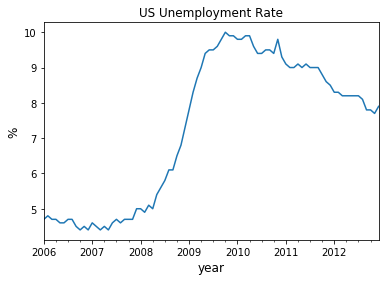

In [12]:
ax=data['2006':'2012'].plot(title='US Unemployment Rate',legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

D:\Anaconda\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


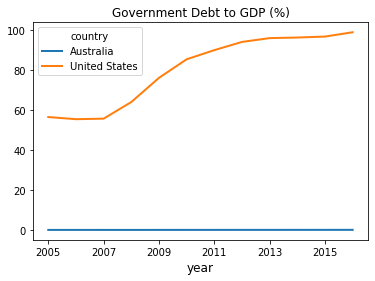

In [16]:
from pandas_datareader import wb
govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US','AU'], start=2005,end=2016).stack().unstack(0)
ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind
ax = govt_debt.plot(lw=2)
ax.set_xlabel('year', fontsize=12)
plt.title("Government Debt to GDP (%)")
plt.show()

In [17]:
import datetime as dt
from pandas_datareader import data

In [18]:
ticker_list = {'INTC': 'Intel',
'MSFT': 'Microsoft',
'IBM': 'IBM',
'BHP': 'BHP',
'TM': 'Toyota',
'AAPL': 'Apple',
'AMZN': 'Amazon',
'BA': 'Boeing',
'QCOM': 'Qualcomm',
'KO': 'Coca-Cola',
'GOOG': 'Google',
'SNE': 'Sony',
'PTR': 'PetroChina'}

In [21]:
def read_data(ticker_list,start=dt.datetime(2019, 1, 2),end=dt.datetime(2019, 12, 31)):
    ticker = pd.DataFrame()
    for tick in ticker_list:
        prices= data.DataReader(tick,'yahoo',start,end)
        closing_prices=prices['Close']
        ticker[tick]=closing_prices
              
    return ticker
                  
ticker=read_data(ticker_list)             

In [22]:
p1=ticker.iloc[0]
p2=ticker.iloc[-1]
price_change=(p2-p1)/p1*100
price_change

INTC    27.1
MSFT    56.0
IBM     16.3
BHP     14.3
TM      20.9
AAPL    85.9
AMZN    20.1
BA       0.6
QCOM    53.7
KO      17.9
GOOG    27.8
SNE     39.6
PTR    -17.4
dtype: float64

In [23]:
change = ticker.pct_change(periods=len(ticker)-1, axis='rows')*100
price_change = change.iloc[-1]
price_change

INTC    27.1
MSFT    56.0
IBM     16.3
BHP     14.3
TM      20.9
AAPL    85.9
AMZN    20.1
BA       0.6
QCOM    53.7
KO      17.9
GOOG    27.8
SNE     39.6
PTR    -17.4
Name: 2019-12-31 00:00:00, dtype: float64

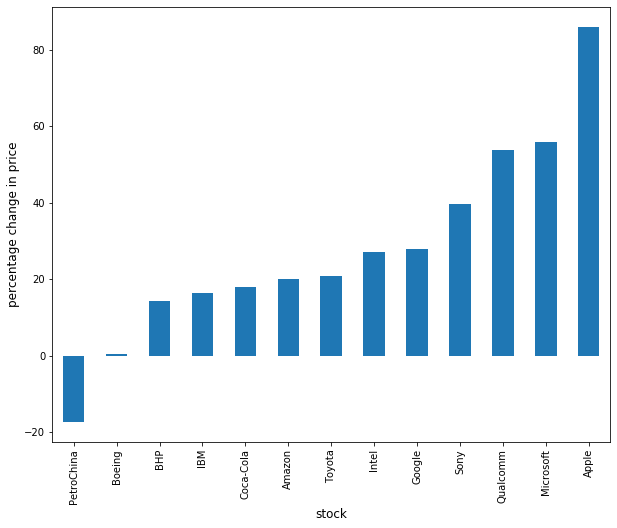

In [24]:
price_change.sort_values(inplace=True)
price_change = price_change.rename(index=ticker_list)
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel('stock', fontsize=12)
ax.set_ylabel('percentage change in price', fontsize=12)
price_change.plot(kind='bar', ax=ax)
plt.show()

In [28]:
indices_list = {'^GSPC': 'S&P 500',
'^IXIC': 'NASDAQ',
'^DJI': 'Dow Jones',
'^N225': 'Nikkei'}
indices_data=read_data(indices_list,start=dt.datetime(2000,1,2),end=dt.datetime(2020,12,31))

In [29]:
yearly_returns=pd.DataFrame()
for index,name in indices_list.items():
    p1=indices_data.groupby(indices_data.index.year)[index].first()
    p2=indices_data.groupby(indices_data.index.year)[index].last()
    returns=(p2-p1)/p1
    yearly_returns[name]=returns
    
yearly_returns

,S&P 500,NASDAQ,Dow Jones,Nikkei
Date,,,,
2000,-9.3e-02,-4.0e-01,-5.0e-02,-2.7e-01
2001,-1.1e-01,-1.5e-01,-5.9e-02,-2.3e-01
2002,-2.4e-01,-3.3e-01,-1.7e-01,-2.1e-01
2003,2.2e-01,4.5e-01,2.1e-01,2.3e-01
2004,9.3e-02,8.4e-02,3.6e-02,6.1e-02
2005,3.8e-02,2.5e-02,-1.1e-03,4.0e-01
2006,1.2e-01,7.6e-02,1.5e-01,5.3e-02
2007,3.7e-02,9.5e-02,6.3e-02,-1.0e-01
2008,-3.8e-01,-4.0e-01,-3.3e-01,-4.0e-01


In [30]:
yearly_returns.describe()

,S&P 500,NASDAQ,Dow Jones,Nikkei
count,2.1e+01,2.1e+01,2.1e+01,2.1e+01
mean,4.7e-02,7.0e-02,4.6e-02,2.9e-02
std,1.6e-01,2.4e-01,1.4e-01,2.3e-01
min,-3.8e-01,-4.0e-01,-3.3e-01,-4.0e-01
25%,-2.7e-02,-3.2e-02,-5.0e-02,-1.5e-01
50%,9.3e-02,9.5e-02,5.7e-02,5.3e-02
75%,1.2e-01,1.5e-01,1.5e-01,1.7e-01
max,2.9e-01,4.5e-01,2.4e-01,5.2e-01


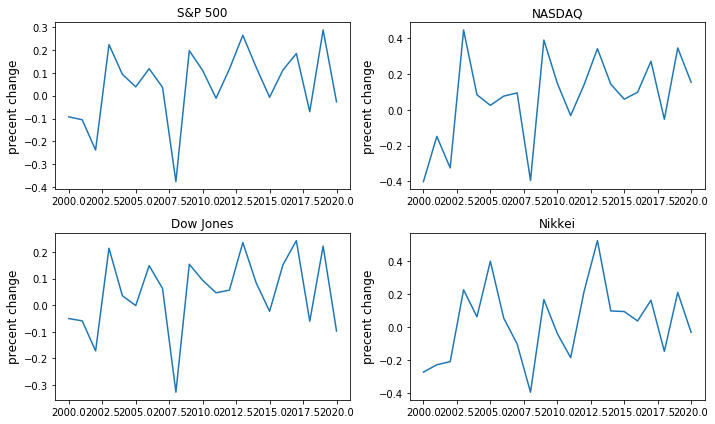

In [32]:
fig,axes=plt.subplots(2,2,figsize=(10,6))
for iter_, ax in enumerate(axes.flatten()):
    index_name=yearly_returns.columns[iter_]
    ax.plot(yearly_returns[index_name])
    ax.set_ylabel("precent change",fontsize=12)
    ax.set_title(index_name)
plt.tight_layout()